# COS Halos Examples  [1.2]

    v1.2 -- Metallicity PDF

## See also the CGM_examples Notebook

In [1]:
# import
import os
from pkg_resources import resource_filename
import numpy as np

from astropy.table import Table
from pyigm.cgm import cos_halos as pch
from pyigm.metallicity import utils as pym_utils
from pyigm.metallicity import pdf as pym_pdf

## Load COS-Halos

In [2]:
cos_halos = pch.COSHalos()

read_sets: Using set file -- 
  /home/xavier/local/Python/linetools/linetools/lists/sets/llist_v1.2.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Be patient, using /home/xavier/local/Python/pyigm/pyigm/data/CGM/COS_Halos/cos-halos_systems.v1.2.tar.gz to load
Skipping a likely folder: CGM_JSON


## Ion Table for the Survey

In [3]:
SiIII_tbl = cos_halos.ion_tbl((14,3))

In [4]:
SiIII_tbl

abssys_name,RA,DEC,comp_name,Z,ion,Ej,vmin,vmax,ion_name,flag_N,logN,sig_logN [2],comment,reliability,z_sys,cgm_name,rho_impact
,deg,deg,,,,1 / cm,km / s,km / s,,,,,,,,,kpc
str25,float64,float64,str14,int64,int64,float64,float64,float64,str5,int64,float64,float64,str1,str4,float64,str17,float64
J101622.6+470643.3_z0.166,154.094166667,47.1120277778,SiIII_z0.16614,14,3,0.0,-277.0,215.0,SiIII,2,13.7450735369,7.73296365471e-13 .. 7.73296365471e-13,,none,0.166137129068,J1016+4706_359_16,46.3230860579
J094331.6+053131.5_z0.228,145.881666667,5.52541666667,SiIII_z0.22839,14,3,0.0,84.0,282.0,SiIII,1,12.8929235735,0.101090468466 .. 0.101090468466,,none,0.228385850787,J0943+0531_106_34,125.213206561
J143726.1+504555.8_z0.246,219.35875,50.7655,SiIII_z0.24600,14,3,0.0,-139.0,231.0,SiIII,3,12.8324415484,9.0 .. 9.0,,none,0.245999068022,J1437+5045_317_38,146.804136085
J141910.2+420746.9_z0.179,214.7925,42.1296944444,SiIII_z0.17925,14,3,0.0,-199.0,119.0,SiIII,2,13.2993624011,2.15802814694e-12 .. 2.15802814694e-12,,none,0.179248124361,J1419+4207_132_30,92.6211417336
J134251.6-005345.3_z0.201,205.715,-0.895916666667,SiIII_z0.20127,14,3,0.0,-173.0,217.0,SiIII,3,12.3784010211,9.0 .. 9.0,,none,0.201268032193,J1342-0053_77_10,32.4766199825
J234500.4-005936.1_z0.254,356.251666667,-0.993361111111,SiIII_z0.25389,14,3,0.0,0.0,143.0,SiIII,0,13.0512506762,0.0579742640257 .. 0.0579742640257,,none,0.253890156746,J2345-0059_356_12,48.8755338361
J143511.5+360437.2_z0.262,218.797916667,36.077,SiIII_z0.26226,14,3,0.0,-100.0,180.0,SiIII,1,12.8490268984,0.0965169742703 .. 0.0965169742703,,none,0.262260317802,J1435+3604_126_21,86.9085194245
J094331.6+053131.5_z0.353,145.881666667,5.52541666667,SiIII_z0.35295,14,3,0.0,-50.0,450.0,SiIII,3,12.9781400958,9.0 .. 9.0,,none,0.352951705456,J0943+0531_227_19,97.1117436511


## EW Table for the Survey for a given transition

In [5]:
trans = 'SiIII 1206'

In [6]:
tbl = cos_halos.trans_tbl(trans)
tbl

/home/xavier/local/Python/linetools/linetools/isgm/abssystem.py:432: UserWarning: No absline with input=SiIII 1206
  warnings.warn("No absline with input={}".format(inp))


sys,z,flag_EW,EW,sig_EW,flag_N,logN,sig_logN,cgm_name
str25,int64,int64,float64,float64,int64,float64,float64,str17
J101622.6+470643.3_z0.166,0,1,0.785282902625,0.0366931088475,2,13.7450735369,0.026504965499,J1016+4706_359_16
J094331.6+053131.5_z0.228,0,1,0.14886255231,0.0358574367941,1,12.8929235735,0.101090468466,J0943+0531_106_34
J143726.1+504555.8_z0.246,0,3,-0.0703141423075,0.0861266085487,3,12.8324415484,9.0,J1437+5045_317_38
J141910.2+420746.9_z0.179,0,1,0.331764889334,0.028007051922,2,13.2993624011,0.036640625447,J1419+4207_132_30
J134251.6-005345.3_z0.201,0,3,-0.0439536561491,0.0305214413134,3,12.3784010211,9.0,J1342-0053_77_10
J234500.4-005936.1_z0.254,0,1,0.211769574863,0.0241436477878,0,13.0512506762,0.0579742640257,J2345-0059_356_12
J143511.5+360437.2_z0.262,0,1,0.134674618051,0.0354212239113,1,12.8490268984,0.0965169742703,J1435+3604_126_21
J094331.6+053131.5_z0.353,0,3,-0.0347198927631,0.130695713527,3,12.9781400958,9.0,J0943+0531_227_19
J134251.6-005345.3_z0.227,0,1,1.10672067823,0.0269377609504,2,13.9903766909,0.0251168683171,J1342-0053_157_10


## NHI Values (Prochaska+17)

In [7]:
NHI_tbl = Table()
NHI_tbl['name'] = cos_halos.name
NHI_tbl['NHI'] = cos_halos.NHI
NHI_tbl['flag_NHI'] = cos_halos.flag_NHI

In [8]:
NHI_tbl

name,NHI,flag_NHI
str17,float64,int64
J1016+4706_359_16,17.5,1
J0943+0531_106_34,16.2441471572,3
J1437+5045_317_38,14.529999733,1
J1419+4207_132_30,16.6254180602,1
J1342-0053_77_10,12.4331159592,3
J2345-0059_356_12,15.9950122833,1
J1435+3604_126_21,15.25041008,1
J0943+0531_227_19,16.6465568774,3
J1342-0053_157_10,18.5,1


## Metallicity PDF

### Load

In [9]:
cos_halos.load_mtl_pdfs()

No detection for J1437+5045_317_38
Skipping
No detection for J1342-0053_77_10
Skipping
Not including 0943+0531_227_19
See Prochaska+17 for details
No detection for J1133+0327_164_21
Skipping
No detection for J1157-0022_230_7
Skipping
No constraint for J1617+0638_253_39
Skipping
No detection for J1550+4001_97_33
Skipping
No detection for J1619+3342_113_40
Skipping
No detection for J0935+0204_15_28
Skipping
No detection for J0226+0015_268_22
Skipping
No detection for J1445+3428_232_33
Skipping
No detection for J0943+0531_216_61
Skipping
No detection for J2257+1340_270_40
Skipping


### Single system

In [10]:
j0226 = cos_halos.cgm_abs[0]
j0226

<CGMAbsSys: J1016+4706_359_16 Galaxy RA/DEC=10:16:22.58+47:06:59.4, zgal=0.166137, rho=46.3231 kpc>

In [11]:
j0226.igm_sys.metallicity

<MetallicityPDF: meanZH=-1.00368>

In [12]:
j0226.igm_sys.metallicity.medianZH

-1.2345460797799086

### Plot

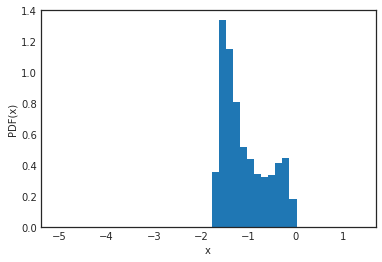

In [13]:
j0226.igm_sys.metallicity.hist_plot()

## $N_{\rm H}$ PDFs

### Load em up
    This requires the files in pyigm/data/CGM/COS_Halos/Cloudy have been installed
    See the README.md file in pyigm/data/CGM/COS_Halos/ for instructions
    And also the pickle file in pyigm/data/CGM/Cloudy  (see the README.md file there for details)

In [14]:
cos_halos.load_NH_pdfs()

/home/xavier/local/Python/pyigm/pyigm/metallicity/utils.py:111: UserWarning: Some NHI values are off the grid.  Correcting..
  warnings.warn("Some NHI values are off the grid.  Correcting..")
/home/xavier/local/Python/pyigm/pyigm/cgm/cos_halos.py:419: UserWarning: One or more NH_values were not finite.  Be careful..
  warnings.warn("One or more NH_values were not finite.  Be careful..")


### One example

In [15]:
cgm_abs = cos_halos.cgm_abs[0]
cgm_abs.igm_sys.NH_PDF

<GenericPDF: mean=19.9342>

In [16]:
cgm_abs.igm_sys.NH_PDF.gmean

2.3504263052011087e+20

----

## Timing

In [17]:
import cProfile, profile
from pyigm.cgm import cos_halos as pch

In [18]:
#reload(pch)
#profile.run('ch = pch.COSHalos(debug=True)')
#ch = pch.COSHalos(debug=True)
#cProfile.run('ch = pch.COSHalos()')
#%prun -s cumtime 'pch.cosHalos(debug=True)'